In [4]:
#Imports


import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from tensorflow.keras.layers.experimental import preprocessing



In [6]:
#Data Set Split

train_dataset = image_dataset_from_directory("Result", 
                validation_split = 0.2,
                subset= "training",
                seed = 123,
                labels = 'inferred',
                label_mode = 'int',
                image_size = [300, 300],
                interpolation = 'nearest',
                batch_size = 64,
                shuffle=True,
)

val_dataset = train_dataset = image_dataset_from_directory("Result", 
                validation_split = 0.2,
                subset= "validation",
                seed = 123,
                labels = 'inferred',
                label_mode = 'int',
                image_size = [300, 300],
                interpolation = 'nearest',
                batch_size = 64,
                shuffle=True,
)

Found 4193 files belonging to 2068 classes.
Using 3355 files for training.
Found 4193 files belonging to 2068 classes.
Using 838 files for validation.


In [7]:
#All Labels 
class_names = train_dataset.class_names


In [8]:

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

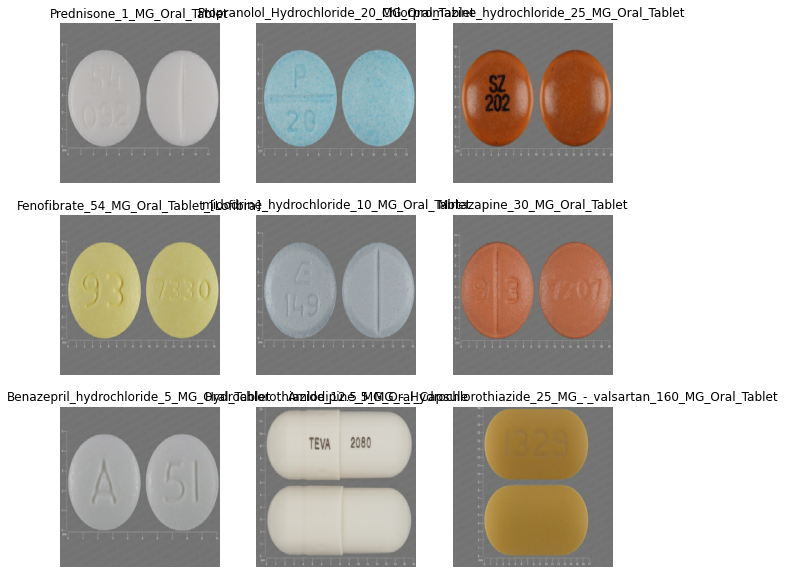

In [9]:
#Example of Pill Images


plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
#DO NOT TRAIN IMAGENET WEIGHTS


hub_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/resnet_50/classification/1")
hub_layer.trainable = False

In [11]:
#Model Data Augmentation + Adding Dense Layers to Train Labels


num_classes = len(class_names)
model = keras.Sequential([
        layers.Rescaling(1./255, input_shape=(300, 300, 3)),
        layers.Resizing(224, 224),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
        layers.RandomContrast(0.1),
        hub_layer,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
        ])
model.build([None, 224, 224, 3])

In [16]:
#Model Parameters


optimizer = tf.keras.optimizers.Adam(epsilon=0.001)
model.compile(
    optimizer='adam',
    #loss=tf.keras.losses.CategoricalCrossentropy(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [17]:
#Model Training


epochs=10000
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/1000
14/14 [==============================] - 64s 5s/step - loss: 6.2646 - accuracy: 0.0060 - val_loss: 6.1710 - val_accuracy: 0.0107
Epoch 2/1000
14/14 [==============================] - 62s 5s/step - loss: 6.1747 - accuracy: 0.0107 - val_loss: 6.1342 - val_accuracy: 0.0107
Epoch 3/1000
14/14 [==============================] - 62s 5s/step - loss: 6.1396 - accuracy: 0.0095 - val_loss: 6.0953 - val_accuracy: 0.0107
Epoch 4/1000
14/14 [==============================] - 63s 5s/step - loss: 6.1000 - accuracy: 0.0119 - val_loss: 6.0624 - val_accuracy: 0.0119
Epoch 5/1000
14/14 [==============================] - 63s 5s/step - loss: 6.0652 - accuracy: 0.0107 - val_loss: 6.0273 - val_accuracy: 0.0107
Epoch 6/1000
14/14 [==============================] - 68s 5s/step - loss: 6.0333 - accuracy: 0.0107 - val_loss: 5.9928 - val_accuracy: 0.0107
Epoch 7/1000
14/14 [==============================] - 68s 5s/step - loss: 6.0005 - accuracy: 0.0095 - val_loss: 5.9567 - val_accuracy: 0.0095
Epoch 

14/14 [==============================] - 68s 5s/step - loss: 4.1489 - accuracy: 0.1158 - val_loss: 4.0817 - val_accuracy: 0.1360
Epoch 59/1000
14/14 [==============================] - 68s 5s/step - loss: 4.1146 - accuracy: 0.1241 - val_loss: 4.0412 - val_accuracy: 0.1468
Epoch 60/1000
14/14 [==============================] - 68s 5s/step - loss: 4.0819 - accuracy: 0.1277 - val_loss: 4.0194 - val_accuracy: 0.1492
Epoch 61/1000
14/14 [==============================] - 68s 5s/step - loss: 4.0660 - accuracy: 0.1277 - val_loss: 3.9924 - val_accuracy: 0.1504
Epoch 62/1000
14/14 [==============================] - 68s 5s/step - loss: 4.0241 - accuracy: 0.1372 - val_loss: 3.9588 - val_accuracy: 0.1527
Epoch 63/1000
14/14 [==============================] - 68s 5s/step - loss: 3.9978 - accuracy: 0.1372 - val_loss: 3.9383 - val_accuracy: 0.1599
Epoch 64/1000
14/14 [==============================] - 68s 5s/step - loss: 3.9840 - accuracy: 0.1468 - val_loss: 3.9078 - val_accuracy: 0.1659
Epoch 65/1000

14/14 [==============================] - 65s 5s/step - loss: 2.8885 - accuracy: 0.3938 - val_loss: 2.8142 - val_accuracy: 0.4356
Epoch 116/1000
14/14 [==============================] - 64s 5s/step - loss: 2.8714 - accuracy: 0.3902 - val_loss: 2.7945 - val_accuracy: 0.4296
Epoch 117/1000
14/14 [==============================] - 67s 5s/step - loss: 2.8524 - accuracy: 0.3974 - val_loss: 2.7670 - val_accuracy: 0.4594
Epoch 118/1000
14/14 [==============================] - 68s 5s/step - loss: 2.8310 - accuracy: 0.4177 - val_loss: 2.7662 - val_accuracy: 0.4499
Epoch 119/1000
14/14 [==============================] - 71s 5s/step - loss: 2.8130 - accuracy: 0.4200 - val_loss: 2.7482 - val_accuracy: 0.4570
Epoch 120/1000
14/14 [==============================] - 70s 5s/step - loss: 2.8111 - accuracy: 0.4045 - val_loss: 2.7264 - val_accuracy: 0.4499
Epoch 121/1000
14/14 [==============================] - 68s 5s/step - loss: 2.7859 - accuracy: 0.4117 - val_loss: 2.7179 - val_accuracy: 0.4463
Epoch 1

Epoch 172/1000
14/14 [==============================] - 68s 5s/step - loss: 2.1364 - accuracy: 0.5871 - val_loss: 2.0614 - val_accuracy: 0.6217
Epoch 173/1000
14/14 [==============================] - 69s 5s/step - loss: 2.1176 - accuracy: 0.5871 - val_loss: 2.0517 - val_accuracy: 0.6360
Epoch 174/1000
14/14 [==============================] - 68s 5s/step - loss: 2.1086 - accuracy: 0.5967 - val_loss: 2.0426 - val_accuracy: 0.6372
Epoch 175/1000
14/14 [==============================] - 68s 5s/step - loss: 2.0988 - accuracy: 0.6014 - val_loss: 2.0327 - val_accuracy: 0.6337
Epoch 176/1000
14/14 [==============================] - 67s 5s/step - loss: 2.1013 - accuracy: 0.5835 - val_loss: 2.0255 - val_accuracy: 0.6408
Epoch 177/1000
14/14 [==============================] - 67s 5s/step - loss: 2.0695 - accuracy: 0.6038 - val_loss: 2.0117 - val_accuracy: 0.6384
Epoch 178/1000
14/14 [==============================] - 68s 5s/step - loss: 2.0719 - accuracy: 0.6026 - val_loss: 1.9988 - val_accuracy:

Epoch 229/1000
14/14 [==============================] - 67s 5s/step - loss: 1.6298 - accuracy: 0.7243 - val_loss: 1.5822 - val_accuracy: 0.7339
Epoch 230/1000
14/14 [==============================] - 68s 5s/step - loss: 1.6327 - accuracy: 0.7041 - val_loss: 1.5730 - val_accuracy: 0.7339
Epoch 231/1000
14/14 [==============================] - 68s 5s/step - loss: 1.6425 - accuracy: 0.6981 - val_loss: 1.5716 - val_accuracy: 0.7279
Epoch 232/1000
14/14 [==============================] - 67s 5s/step - loss: 1.6109 - accuracy: 0.7160 - val_loss: 1.5555 - val_accuracy: 0.7470
Epoch 233/1000
14/14 [==============================] - 68s 5s/step - loss: 1.6200 - accuracy: 0.7112 - val_loss: 1.5504 - val_accuracy: 0.7482
Epoch 234/1000
14/14 [==============================] - 67s 5s/step - loss: 1.6086 - accuracy: 0.7232 - val_loss: 1.5485 - val_accuracy: 0.7458
Epoch 235/1000
14/14 [==============================] - 67s 5s/step - loss: 1.6090 - accuracy: 0.7005 - val_loss: 1.5405 - val_accuracy:

Epoch 286/1000
14/14 [==============================] - 67s 5s/step - loss: 1.3021 - accuracy: 0.7757 - val_loss: 1.2452 - val_accuracy: 0.8091
Epoch 287/1000
14/14 [==============================] - 67s 5s/step - loss: 1.2856 - accuracy: 0.7888 - val_loss: 1.2382 - val_accuracy: 0.8150
Epoch 288/1000
14/14 [==============================] - 68s 5s/step - loss: 1.2741 - accuracy: 0.7947 - val_loss: 1.2266 - val_accuracy: 0.8162
Epoch 289/1000
14/14 [==============================] - 67s 5s/step - loss: 1.2880 - accuracy: 0.7852 - val_loss: 1.2286 - val_accuracy: 0.8019
Epoch 290/1000
14/14 [==============================] - 68s 5s/step - loss: 1.2803 - accuracy: 0.7780 - val_loss: 1.2286 - val_accuracy: 0.8019
Epoch 291/1000
14/14 [==============================] - 68s 5s/step - loss: 1.2830 - accuracy: 0.7757 - val_loss: 1.2226 - val_accuracy: 0.8126
Epoch 292/1000
14/14 [==============================] - 68s 5s/step - loss: 1.2765 - accuracy: 0.7780 - val_loss: 1.2151 - val_accuracy:

Epoch 343/1000
14/14 [==============================] - 63s 5s/step - loss: 1.0456 - accuracy: 0.8341 - val_loss: 1.0012 - val_accuracy: 0.8496
Epoch 344/1000
14/14 [==============================] - 62s 5s/step - loss: 1.0417 - accuracy: 0.8341 - val_loss: 0.9948 - val_accuracy: 0.8484
Epoch 345/1000
14/14 [==============================] - 63s 5s/step - loss: 1.0409 - accuracy: 0.8341 - val_loss: 0.9867 - val_accuracy: 0.8604
Epoch 346/1000
14/14 [==============================] - 63s 5s/step - loss: 1.0368 - accuracy: 0.8305 - val_loss: 0.9906 - val_accuracy: 0.8461
Epoch 347/1000
14/14 [==============================] - 62s 5s/step - loss: 1.0323 - accuracy: 0.8341 - val_loss: 0.9851 - val_accuracy: 0.8532
Epoch 348/1000
14/14 [==============================] - 63s 5s/step - loss: 1.0262 - accuracy: 0.8401 - val_loss: 0.9806 - val_accuracy: 0.8544
Epoch 349/1000
14/14 [==============================] - 63s 5s/step - loss: 1.0146 - accuracy: 0.8437 - val_loss: 0.9745 - val_accuracy:

Epoch 400/1000
14/14 [==============================] - 87s 6s/step - loss: 0.8641 - accuracy: 0.8616 - val_loss: 0.8146 - val_accuracy: 0.8747
Epoch 401/1000
14/14 [==============================] - 88s 6s/step - loss: 0.8634 - accuracy: 0.8675 - val_loss: 0.8101 - val_accuracy: 0.8807
Epoch 402/1000
14/14 [==============================] - 94s 7s/step - loss: 0.8493 - accuracy: 0.8687 - val_loss: 0.8061 - val_accuracy: 0.8819
Epoch 403/1000
14/14 [==============================] - 94s 7s/step - loss: 0.8454 - accuracy: 0.8687 - val_loss: 0.8061 - val_accuracy: 0.8795
Epoch 404/1000
14/14 [==============================] - 96s 7s/step - loss: 0.8388 - accuracy: 0.8687 - val_loss: 0.8002 - val_accuracy: 0.8831
Epoch 405/1000
14/14 [==============================] - 96s 7s/step - loss: 0.8371 - accuracy: 0.8699 - val_loss: 0.7980 - val_accuracy: 0.8795
Epoch 406/1000
14/14 [==============================] - 97s 7s/step - loss: 0.8433 - accuracy: 0.8628 - val_loss: 0.7937 - val_accuracy:

Epoch 457/1000
14/14 [==============================] - 74s 5s/step - loss: 0.7099 - accuracy: 0.8902 - val_loss: 0.6689 - val_accuracy: 0.9069
Epoch 458/1000
14/14 [==============================] - 67s 5s/step - loss: 0.7059 - accuracy: 0.8890 - val_loss: 0.6680 - val_accuracy: 0.9045
Epoch 459/1000
14/14 [==============================] - 68s 5s/step - loss: 0.6969 - accuracy: 0.8914 - val_loss: 0.6638 - val_accuracy: 0.9045
Epoch 460/1000
14/14 [==============================] - 67s 5s/step - loss: 0.7053 - accuracy: 0.8890 - val_loss: 0.6594 - val_accuracy: 0.9033
Epoch 461/1000
14/14 [==============================] - 66s 5s/step - loss: 0.7005 - accuracy: 0.8914 - val_loss: 0.6597 - val_accuracy: 0.8986
Epoch 462/1000
14/14 [==============================] - 67s 5s/step - loss: 0.6930 - accuracy: 0.8890 - val_loss: 0.6560 - val_accuracy: 0.9033
Epoch 463/1000
14/14 [==============================] - 69s 5s/step - loss: 0.6825 - accuracy: 0.8974 - val_loss: 0.6514 - val_accuracy:

Epoch 514/1000
14/14 [==============================] - 68s 5s/step - loss: 0.5858 - accuracy: 0.9117 - val_loss: 0.5544 - val_accuracy: 0.9260
Epoch 515/1000
14/14 [==============================] - 68s 5s/step - loss: 0.5784 - accuracy: 0.9165 - val_loss: 0.5495 - val_accuracy: 0.9260
Epoch 516/1000
14/14 [==============================] - 68s 5s/step - loss: 0.5874 - accuracy: 0.9069 - val_loss: 0.5516 - val_accuracy: 0.9248
Epoch 517/1000
14/14 [==============================] - 68s 5s/step - loss: 0.5792 - accuracy: 0.9129 - val_loss: 0.5481 - val_accuracy: 0.9260
Epoch 518/1000
14/14 [==============================] - 68s 5s/step - loss: 0.5794 - accuracy: 0.9105 - val_loss: 0.5455 - val_accuracy: 0.9272
Epoch 519/1000
14/14 [==============================] - 68s 5s/step - loss: 0.5775 - accuracy: 0.9153 - val_loss: 0.5452 - val_accuracy: 0.9248
Epoch 520/1000
14/14 [==============================] - 68s 5s/step - loss: 0.5810 - accuracy: 0.9117 - val_loss: 0.5426 - val_accuracy:

Epoch 571/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4866 - accuracy: 0.9248 - val_loss: 0.4588 - val_accuracy: 0.9344
Epoch 572/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4890 - accuracy: 0.9272 - val_loss: 0.4624 - val_accuracy: 0.9344
Epoch 573/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4882 - accuracy: 0.9272 - val_loss: 0.4577 - val_accuracy: 0.9415
Epoch 574/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4821 - accuracy: 0.9332 - val_loss: 0.4594 - val_accuracy: 0.9403
Epoch 575/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4867 - accuracy: 0.9296 - val_loss: 0.4577 - val_accuracy: 0.9391
Epoch 576/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4818 - accuracy: 0.9344 - val_loss: 0.4527 - val_accuracy: 0.9368
Epoch 577/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4778 - accuracy: 0.9332 - val_loss: 0.4518 - val_accuracy:

Epoch 628/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4126 - accuracy: 0.9391 - val_loss: 0.3891 - val_accuracy: 0.9487
Epoch 629/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4182 - accuracy: 0.9403 - val_loss: 0.3900 - val_accuracy: 0.9439
Epoch 630/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4125 - accuracy: 0.9344 - val_loss: 0.3864 - val_accuracy: 0.9451
Epoch 631/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4110 - accuracy: 0.9427 - val_loss: 0.3824 - val_accuracy: 0.9535
Epoch 632/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4072 - accuracy: 0.9463 - val_loss: 0.3833 - val_accuracy: 0.9511
Epoch 633/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4127 - accuracy: 0.9427 - val_loss: 0.3851 - val_accuracy: 0.9475
Epoch 634/1000
14/14 [==============================] - 68s 5s/step - loss: 0.4042 - accuracy: 0.9415 - val_loss: 0.3816 - val_accuracy:

Epoch 685/1000
14/14 [==============================] - 68s 5s/step - loss: 0.3520 - accuracy: 0.9463 - val_loss: 0.3310 - val_accuracy: 0.9511
Epoch 686/1000
14/14 [==============================] - 68s 5s/step - loss: 0.3569 - accuracy: 0.9487 - val_loss: 0.3306 - val_accuracy: 0.9523
Epoch 687/1000
14/14 [==============================] - 68s 5s/step - loss: 0.3454 - accuracy: 0.9511 - val_loss: 0.3261 - val_accuracy: 0.9594
Epoch 688/1000
14/14 [==============================] - 68s 5s/step - loss: 0.3501 - accuracy: 0.9499 - val_loss: 0.3277 - val_accuracy: 0.9594
Epoch 689/1000
14/14 [==============================] - 69s 5s/step - loss: 0.3461 - accuracy: 0.9535 - val_loss: 0.3261 - val_accuracy: 0.9582
Epoch 690/1000
14/14 [==============================] - 68s 5s/step - loss: 0.3436 - accuracy: 0.9499 - val_loss: 0.3233 - val_accuracy: 0.9570
Epoch 691/1000
14/14 [==============================] - 68s 5s/step - loss: 0.3420 - accuracy: 0.9511 - val_loss: 0.3251 - val_accuracy:

Epoch 742/1000
14/14 [==============================] - 69s 5s/step - loss: 0.3007 - accuracy: 0.9570 - val_loss: 0.2810 - val_accuracy: 0.9666
Epoch 743/1000
14/14 [==============================] - 68s 5s/step - loss: 0.3015 - accuracy: 0.9547 - val_loss: 0.2805 - val_accuracy: 0.9570
Epoch 744/1000
14/14 [==============================] - 68s 5s/step - loss: 0.3015 - accuracy: 0.9547 - val_loss: 0.2799 - val_accuracy: 0.9618
Epoch 745/1000
14/14 [==============================] - 68s 5s/step - loss: 0.2965 - accuracy: 0.9570 - val_loss: 0.2790 - val_accuracy: 0.9547
Epoch 746/1000
14/14 [==============================] - 68s 5s/step - loss: 0.3020 - accuracy: 0.9511 - val_loss: 0.2787 - val_accuracy: 0.9618
Epoch 747/1000
14/14 [==============================] - 68s 5s/step - loss: 0.2976 - accuracy: 0.9523 - val_loss: 0.2786 - val_accuracy: 0.9570
Epoch 748/1000
14/14 [==============================] - 68s 5s/step - loss: 0.2987 - accuracy: 0.9535 - val_loss: 0.2775 - val_accuracy:

Epoch 799/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2673 - accuracy: 0.9618 - val_loss: 0.2448 - val_accuracy: 0.9654
Epoch 800/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2614 - accuracy: 0.9606 - val_loss: 0.2424 - val_accuracy: 0.9630
Epoch 801/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2556 - accuracy: 0.9570 - val_loss: 0.2395 - val_accuracy: 0.9654
Epoch 802/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2581 - accuracy: 0.9594 - val_loss: 0.2415 - val_accuracy: 0.9606
Epoch 803/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2569 - accuracy: 0.9582 - val_loss: 0.2406 - val_accuracy: 0.9630
Epoch 804/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2523 - accuracy: 0.9618 - val_loss: 0.2371 - val_accuracy: 0.9642
Epoch 805/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2527 - accuracy: 0.9618 - val_loss: 0.2398 - val_accuracy:

Epoch 856/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2234 - accuracy: 0.9630 - val_loss: 0.2106 - val_accuracy: 0.9666
Epoch 857/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2280 - accuracy: 0.9618 - val_loss: 0.2106 - val_accuracy: 0.9666
Epoch 858/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2244 - accuracy: 0.9630 - val_loss: 0.2081 - val_accuracy: 0.9666
Epoch 859/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2231 - accuracy: 0.9630 - val_loss: 0.2093 - val_accuracy: 0.9642
Epoch 860/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2240 - accuracy: 0.9618 - val_loss: 0.2084 - val_accuracy: 0.9666
Epoch 861/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2233 - accuracy: 0.9642 - val_loss: 0.2081 - val_accuracy: 0.9642
Epoch 862/1000
14/14 [==============================] - 63s 5s/step - loss: 0.2169 - accuracy: 0.9618 - val_loss: 0.2069 - val_accuracy:

Epoch 913/1000
14/14 [==============================] - 68s 5s/step - loss: 0.2010 - accuracy: 0.9618 - val_loss: 0.1845 - val_accuracy: 0.9690
Epoch 914/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1967 - accuracy: 0.9678 - val_loss: 0.1833 - val_accuracy: 0.9714
Epoch 915/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1987 - accuracy: 0.9642 - val_loss: 0.1828 - val_accuracy: 0.9737
Epoch 916/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1988 - accuracy: 0.9654 - val_loss: 0.1825 - val_accuracy: 0.9726
Epoch 917/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1953 - accuracy: 0.9654 - val_loss: 0.1820 - val_accuracy: 0.9690
Epoch 918/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1945 - accuracy: 0.9630 - val_loss: 0.1806 - val_accuracy: 0.9678
Epoch 919/1000
14/14 [==============================] - 69s 5s/step - loss: 0.1931 - accuracy: 0.9666 - val_loss: 0.1800 - val_accuracy:

Epoch 970/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1753 - accuracy: 0.9678 - val_loss: 0.1622 - val_accuracy: 0.9726
Epoch 971/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1743 - accuracy: 0.9666 - val_loss: 0.1617 - val_accuracy: 0.9737
Epoch 972/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1756 - accuracy: 0.9654 - val_loss: 0.1613 - val_accuracy: 0.9702
Epoch 973/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1731 - accuracy: 0.9666 - val_loss: 0.1611 - val_accuracy: 0.9726
Epoch 974/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1698 - accuracy: 0.9690 - val_loss: 0.1597 - val_accuracy: 0.9702
Epoch 975/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1713 - accuracy: 0.9654 - val_loss: 0.1596 - val_accuracy: 0.9702
Epoch 976/1000
14/14 [==============================] - 68s 5s/step - loss: 0.1722 - accuracy: 0.9666 - val_loss: 0.1593 - val_accuracy:

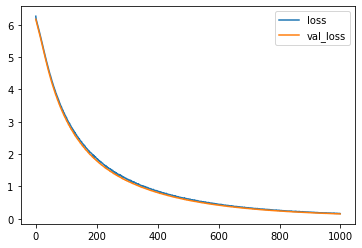

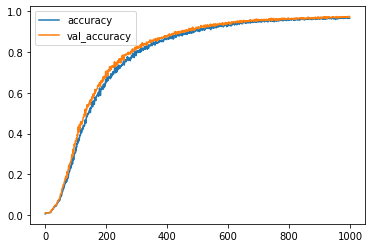

In [18]:
#Model Results


history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [21]:
#Save Trained Model


model.save('Resnet50Files')

INFO:tensorflow:Assets written to: Resnet50Files\assets


INFO:tensorflow:Assets written to: Resnet50Files\assets
